In [ ]:
!pip install opencv-python

In [ ]:
import tensorflow as tf

In [ ]:
mnist_data = tf.keras.datasets.mnist#this is basically handwritten characters based on 28x28 sized images of 0 to 9.

In [ ]:
#unpacking the dataset into train and test datasets
(x_train,y_train),(x_test,y_test) = mnist_data.load_data()

In [ ]:
x_train.shape #it has 60,000 images and every img has 28by28 size

(60000, 28, 28)

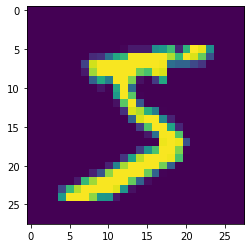

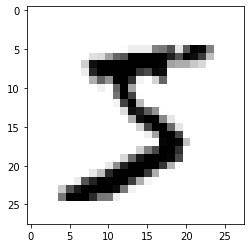

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()#to excecute graph
#however we donno whether it is a color img or binary img
#inorder to plot it change the configuratiplt.inshow(x_train[0])
plt.imshow(x_train[0], cmap =plt.cm.binary)

In [ ]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

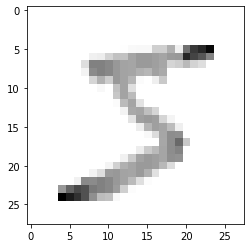

In [ ]:
#its all gray img and all values vary from 0 to 255
#in order to normalize it 
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)


In [ ]:
print(x_train[0])#all the values are normalized like all values are from 0 to 1 cause it is divided by 255(becomes cl
#oser to 1)


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
print(y_train[0])#just to check we have labels inside N/W.


5


In [ ]:
import numpy as np
IMG_SIZE=28
x_trainer = np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)#increaseing one dimension for kernel(filter) operation(maximum value i.e -1 corressponds to 60,000)
x_tester = np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)#increaseing one dimension for kernel operation
print("training sample" ,x_trainer.shape)
print("testing sample" ,x_tester.shape)

training sample (60000, 28, 28, 1)
testing sample (10000, 28, 28, 1)


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D

from tensorflow.keras.optimizers import Adam

In [ ]:
#create neural N/W

model = Sequential()
#first convolution layer #1,2,3 (60,000,28,28,1) 28-3+1=26 (26x26)
model.add(Conv2D(64, (3,3),  input_shape = x_trainer.shape[1:]))#only for first convolution layer to mention i/p layer size
model.add(Activation('relu'))#activation function to make it nonlinear for all the values less than 0 it will drop values if it is grater than 0 it allow to move
#to next layer.
model.add(MaxPooling2D(pool_size=(2,2)))#maxpooling only single maximum value of 2x2 matrix it will get and rest it will drop 


#second convolution layer 
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))#activation function to make it nonlinear for all the values less than 0 it will drop values if it is grater than 0 it allow to move
#to next layer.
model.add(MaxPooling2D(pool_size=(2,2)))#maxpooling only single maximum value of 2x2 matrix it will get and rest it will drop 


#third convolution layer
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))#activation function to make it nonlinear for all the values less than 0 it will drop values if it is grater than 0 it allow to move
#to next layer.
model.add(MaxPooling2D(pool_size=(2,2)))#maxpooling only single maximum value of 2x2 matrix it will get and rest it will drop 

#fully connected layer(20x20)
model.add(Flatten())#before using fully connected layer we need to convert 2D to 1D using flatten
model.add(Dense(64))#each 400 neurons connected to each of 64
model.add(Activation('sigmoid'))

# 2nd fully connected layer
model.add(Dense(32))
model.add(Activation('sigmoid'))

#last fully connected layer o/p must be equal to no of classes 10(0-9)
model.add(Dense(10))#this last dense layer must be equal to 10
model.add(Activation('softmax'))#activation function is changed to softmax(class probabilities)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [ ]:
print("training samples",len(x_trainer))

training samples 60000


In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_trainer,y_train,epochs=6,validation_split=0.3)#training the data .
#during training model.fit(x,y, validation_split= 0.3)
#so Training data was 60,000, and test was 10,000
#So in order to further split training into validation data, I defined validation_split= 0.3, 
#60,000 * 0.3 =  180000
#so 18000 => validation dataset
#60,000-18000 = 42000 (Training dataset after subtracting validation dataset)

#you can change validation_split= 0.3, to any percentage you want, but its usual practice to divide into 70 vs 30 percentage

Epoch 1/6
1313/1313 [==============================] - 61s 46ms/step - loss: 1.3565 - accuracy: 0.6275 - val_loss: 0.1907 - val_accuracy: 0.9532
Epoch 2/6
1313/1313 [==============================] - 61s 46ms/step - loss: 0.1607 - accuracy: 0.9592 - val_loss: 0.1194 - val_accuracy: 0.9669
Epoch 3/6
1313/1313 [==============================] - 60s 46ms/step - loss: 0.0983 - accuracy: 0.9739 - val_loss: 0.0899 - val_accuracy: 0.9736
Epoch 4/6
1313/1313 [==============================] - 61s 46ms/step - loss: 0.0716 - accuracy: 0.9803 - val_loss: 0.0767 - val_accuracy: 0.9772
Epoch 5/6
1313/1313 [==============================] - 62s 47ms/step - loss: 0.0523 - accuracy: 0.9850 - val_loss: 0.0732 - val_accuracy: 0.9789
Epoch 6/6
1313/1313 [==============================] - 61s 47ms/step - loss: 0.0437 - accuracy: 0.9878 - val_loss: 0.0729 - val_accuracy: 0.9793


In [ ]:
#validation accuracy almost= to accuracy -> model doing well
#validation accuracy   < accuracy ->  leads to overfitting -> solution is dropout.

In [ ]:
#Evaluating on testing dataset i.e 10,000 testing samples
test_loss , test_acc = model.evaluate(x_tester,y_test)
print("test loss on 10,000 test samples",test_loss)
print("validation accuracy on 10,000 test samples",test_acc)

313/313 [==============================] - 4s 12ms/step - loss: 0.0632 - accuracy: 0.9823
test loss on 10,000 test samples 0.06323278695344925
validation accuracy on 10,000 test samples 0.9822999835014343


In [ ]:
predictions = model.predict(x_tester)

In [ ]:
print(predictions)#these predictions are based on one hot encoding so these are only arrays, containing softmax probabilities.

[[7.6962060e-05 6.4895139e-05 2.0665392e-04 ... 9.9887198e-01
  8.6118322e-05 4.6381008e-04]
 [2.3624570e-04 1.9100076e-04 9.9759883e-01 ... 7.4729347e-04
  1.7690577e-04 1.1375032e-04]
 [3.1318101e-05 9.9960405e-01 2.4367244e-05 ... 1.4613494e-05
  7.3462455e-05 1.5478226e-06]
 ...
 [3.3810568e-06 1.2886711e-06 9.5245116e-05 ... 1.2052638e-05
  1.4372096e-04 5.6274957e-04]
 [1.9510181e-04 2.9175888e-05 6.3888683e-06 ... 5.5654382e-06
  4.0776236e-04 3.5990361e-04]
 [4.4384331e-04 1.6840239e-04 2.7186610e-04 ... 8.7136641e-06
  1.5157553e-04 6.8689304e-05]]


In [ ]:
#we need to decode softmax probabilities ,we need to use numpy for that
print(np.argmax(predictions[0]))#Returns a maximum value corresponding to the element index value First,

7


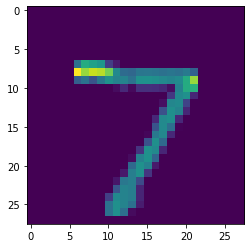

In [ ]:
plt.imshow(x_test[0])

In [ ]:
print(np.argmax(predictions[128]))

8


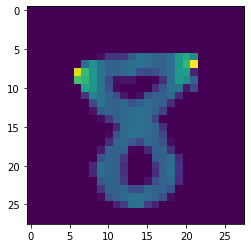

In [ ]:
plt.imshow(x_test[128])

In [ ]:
print(np.argmax(predictions[154]))

1


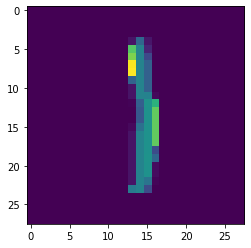

In [ ]:
plt.imshow(x_test[154])

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt



In [ ]:
img = cv2.imread('tt.png')


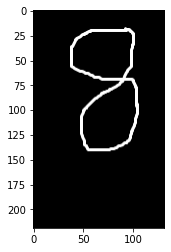

In [ ]:
plt.imshow(img)


In [ ]:
img.shape

(219, 132, 3)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY ) 


In [ ]:
gray.shape

(219, 132)

In [ ]:
#above img is not 28x28 so we need to resize
resized = cv2.resize(gray,(28,28) , interpolation=cv2.INTER_AREA)

In [ ]:
resized.shape

(28, 28)

In [ ]:
newimg = tf.keras.utils.normalize(resized,axis=1)#0 to 1 scaling

In [ ]:
newimg = np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1)#kernel operation of convolution layer

In [ ]:
newimg.shape

(1, 28, 28, 1)

In [ ]:
predictions = model.predict(newimg)

In [ ]:
print(np.argmax(predictions))

9
